# 第5回課題
第5回課題では，以下の項目を満たすように分析してください．

明確な解答は用意していませんが，少なくとも間違っていないと言える推論をするようにしてください．

- データの取得
- データの確認
 - 特徴量の確認
 - ラベルの確認
- 仮説を立てる
- データの分析
- モデルの訓練
- 予測
- 精度の確認
- 仮説の確認

# データの取得
wine data 以外を利用してデータ分析してください．

なるべく，ラベルと属性から推論が立てやすいデータを選択するとやりやすいです．

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

# データの確認
データ分析以前にわかることを確認．特徴量の属性やドメイン知識など
- 特徴量の確認
- ラベルの確認

In [2]:
data = load_boston()

In [3]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
np.array(data['data']).shape

(506, 13)

In [5]:
data['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [6]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# 仮説を立てる
データについて，導きたい仮説と結論を整理してください．

住宅街面積(ZN)，商業(INDUS)，NOX濃度(NOX)，部屋数(RM)，低所得者比率(LSTAT)が住宅価格と関係しそう

# データの分析

In [7]:
X, Y = data['data'], data['target']

In [8]:
boston_df = pd.DataFrame(data['data'],columns = data['feature_names'])
boston_df = pd.concat([boston_df, pd.DataFrame(data["target"], columns=["target"])], axis=1)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


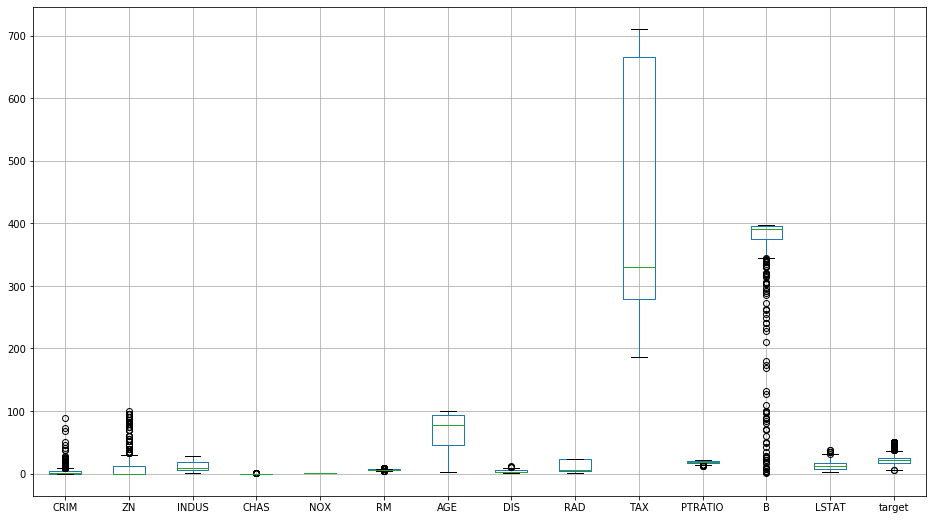

In [10]:
boston_df.boxplot(figsize=(16,9))
#TAXとBが大きい

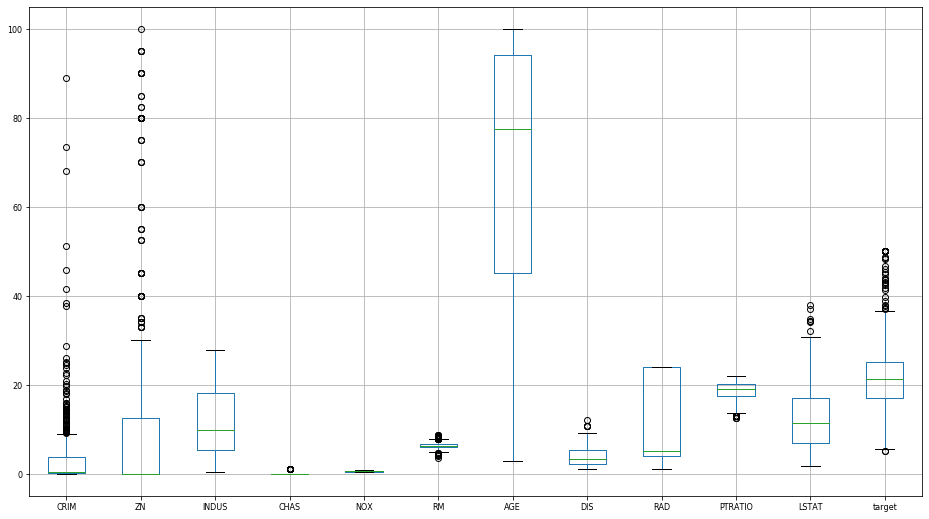

In [11]:
#TAX B 除く
boston_df[[c for c in boston_df.columns if c not in ['TAX','B']]].boxplot(figsize=(16,9), fontsize=8)

In [12]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

In [13]:
#正規化
boston_df = pd.DataFrame(min_max_scaler.fit_transform(data["data"]), columns=data["feature_names"])
boston_df = pd.concat([boston_df, pd.DataFrame(data["target"], columns=["target"])], axis=1)
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,24.0
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,21.6
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,34.7
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,33.4
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,36.2


In [14]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.040544,0.113636,0.391378,0.069170,0.349167,0.521869,0.676364,0.242381,0.371713,0.422208,0.622929,0.898568,0.301409,22.532806
std,0.096679,0.233225,0.251479,0.253994,0.238431,0.134627,0.289896,0.191482,0.378576,0.321636,0.230313,0.230205,0.197049,9.197104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,0.000851,0.000000,0.173387,0.000000,0.131687,0.445392,0.433831,0.088259,0.130435,0.175573,0.510638,0.945730,0.144040,17.025000
50%,0.002812,0.000000,0.338343,0.000000,0.314815,0.507281,0.768280,0.188949,0.173913,0.272901,0.686170,0.986232,0.265728,21.200000
75%,0.041258,0.125000,0.646628,0.000000,0.491770,0.586798,0.938980,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,25.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000


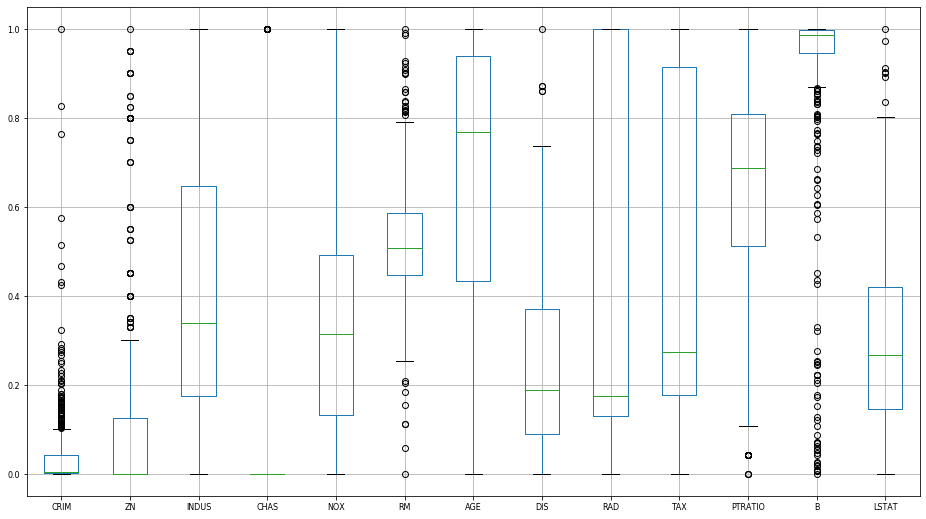

In [15]:
boston_df[[c for c in boston_df.columns if c not in ['target']]].boxplot(figsize=(16,9), fontsize=8)

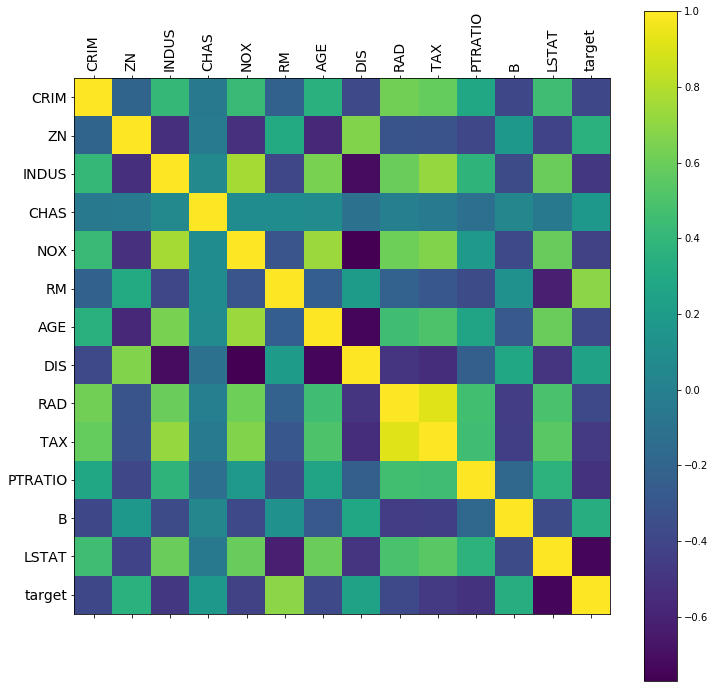

In [16]:
#相関を見る
fig = plt.figure(figsize=(12, 12))
plt.matshow(boston_df.corr("pearson"), fignum=fig.number)
plt.xticks(range(boston_df.shape[1]), boston_df.columns, fontsize=14, rotation=90)
plt.yticks(range(boston_df.shape[1]), boston_df.columns, fontsize=14)
plt.colorbar()

In [17]:
#CRIM INDUS NOX AGE RAD TAX PTRATIO LSTATがtargetとの負の相関大
#RMがtargetとの正の相関大

In [18]:
#組み合わせ
corr = boston_df.corr().values
[[boston_df.columns[i], boston_df.columns[j], corr[i][j]] for i in range(boston_df.shape[1]-1) for j in range(boston_df.shape[1]-1) if abs(corr[i][j]) >= 0.4 and corr[i][j] != 1]
#TAXとRADの相関が特に大きい

[['CRIM', 'INDUS', 0.4065834114062605],
 ['CRIM', 'NOX', 0.42097171139245626],
 ['CRIM', 'RAD', 0.6255051452626011],
 ['CRIM', 'TAX', 0.5827643120325859],
 ['CRIM', 'LSTAT', 0.45562147944794673],
 ['ZN', 'INDUS', -0.5338281863044644],
 ['ZN', 'NOX', -0.516603707827982],
 ['ZN', 'AGE', -0.5695373420992096],
 ['ZN', 'DIS', 0.6644082227621073],
 ['ZN', 'LSTAT', -0.41299457452700106],
 ['INDUS', 'CRIM', 0.4065834114062605],
 ['INDUS', 'ZN', -0.5338281863044644],
 ['INDUS', 'NOX', 0.7636514469209145],
 ['INDUS', 'AGE', 0.6447785113552565],
 ['INDUS', 'DIS', -0.7080269887427696],
 ['INDUS', 'RAD', 0.595129274603847],
 ['INDUS', 'TAX', 0.7207601799515442],
 ['INDUS', 'LSTAT', 0.6037997164766226],
 ['NOX', 'CRIM', 0.42097171139245626],
 ['NOX', 'ZN', -0.516603707827982],
 ['NOX', 'INDUS', 0.7636514469209145],
 ['NOX', 'AGE', 0.7314701037859592],
 ['NOX', 'DIS', -0.7692301132258282],
 ['NOX', 'RAD', 0.6114405634855766],
 ['NOX', 'TAX', 0.6680232004030231],
 ['NOX', 'LSTAT', 0.5908789208808464],

# モデルの訓練
データは分割するようにしてください．交叉検証についてはまだ説明したいので自由にしてください．

また，モデルの訓練およびデータ分割時に乱数の指定がないなど再現性がなさそうなコードは認めないことにします．

モデルは自由ですが，sklearn を想定しています．自作ライブラリも可ですが，自作の場合，該当箇所は適当に読みます．

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(boston_df[data["feature_names"]], boston_df["target"], test_size=0.33, random_state=1)

In [21]:
X_train.shape, X_test.shape

((339, 13), (167, 13))

# 予測

# SVR

In [22]:
from sklearn.svm import LinearSVR

In [23]:
# 訓練
rgr = LinearSVR(random_state=0)
rgr.fit(X_train, y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=0, tol=0.0001, verbose=0)

In [24]:
pred = rgr.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error

# 精度の確認

In [26]:
mean_squared_error(y_test, pred)

34.704399984143386

# 仮説の確認
最初に立てた仮説を確認してください．

予測傾向など精度ベースでも仮説を確認することはできますが，決定木や可視化を用いる方が楽かもしれません．

In [27]:
#特徴量の重み
coef2 = [x/(max(rgr.coef_)) for x in rgr.coef_]
list(zip(data['feature_names'],coef2))

[('CRIM', -0.11928810621575804),
 ('ZN', 0.27672428254040937),
 ('INDUS', 0.054631279457545916),
 ('CHAS', 0.17010970435186293),
 ('NOX', -0.09523747948689221),
 ('RM', 1.0),
 ('AGE', -0.11837789037241922),
 ('DIS', -0.06345761515878354),
 ('RAD', 0.06540079671881963),
 ('TAX', -0.1257570197976513),
 ('PTRATIO', -0.24897261851491173),
 ('B', 0.3918810090158269),
 ('LSTAT', -0.499512135043056)]

・RMとLSTATの重みは仮説通り大きいが，ZN，INDUSおよびNOXの重みは小さかった  
・Bの重みはRMとLSTATに次いで大きい⇒黒人比率が低いほどBは高い 人種格差を反映?